<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.1  Pakcage installation and updates

In [155]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.2 Importing the data set.
Source: https://ourworldindata.org/urbanization

In [4]:
## importing the dataset
challenge_dataset=pd.read_csv(r'C:\Users\user pc\Desktop\DTE Datathon\urban-and-rural-population.csv')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">1.3 Data Cleaning.

In [5]:
### displaying a description of the dataset to get a five point number summary

challenge_dataset.describe()

## obtaining more information about the dataset
print(challenge_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14168 entries, 0 to 14167
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            14168 non-null  object 
 1   Code              13268 non-null  object 
 2   Year              14168 non-null  int64  
 3   Urban population  14168 non-null  int64  
 4   Rural population  14168 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 553.6+ KB
None


In [6]:
### viewing the first few data points
challenge_dataset.head(10)

,Entity,Code,Year,Urban population,Rural population
0,Afghanistan,AFG,1960,724373,7898093.0
1,Afghanistan,AFG,1961,763336,8026804.0
2,Afghanistan,AFG,1962,805062,8163985.0
3,Afghanistan,AFG,1963,849446,8308019.0
4,Afghanistan,AFG,1964,896820,8458694.0
5,Afghanistan,AFG,1965,947332,8617815.0
6,Afghanistan,AFG,1966,1001109,8782038.0
7,Afghanistan,AFG,1967,1058060,8951970.0
8,Afghanistan,AFG,1968,1118853,9128927.0
9,Afghanistan,AFG,1969,1183254,9311235.0


In [7]:
### filtering the dataset to retain only Kenyan data which we are interested in.
kenyan_df_population= challenge_dataset[challenge_dataset['Entity'] == 'Kenya']

## displaying the new dataframe

kenyan_df_population.head(5)


,Entity,Code,Year,Urban population,Rural population
6572,Kenya,KEN,1960,570661,7180774.0
6573,Kenya,KEN,1961,608791,7438679.0
6574,Kenya,KEN,1962,650185,7713393.0
6575,Kenya,KEN,1963,699081,7998119.0
6576,Kenya,KEN,1964,752562,8294825.0


In [8]:
## resetting indexing for the created df

kenyan_df_population=kenyan_df_population.reset_index(drop=True)


In [9]:
print(kenyan_df_population)

   Entity Code  Year  Urban population  Rural population
0   Kenya  KEN  1960            570661         7180774.0
1   Kenya  KEN  1961            608791         7438679.0
2   Kenya  KEN  1962            650185         7713393.0
3   Kenya  KEN  1963            699081         7998119.0
4   Kenya  KEN  1964            752562         8294825.0
..    ...  ...   ...               ...               ...
57  Kenya  KEN  2017          13001604        35946532.0
58  Kenya  KEN  2018          13502378        36450930.0
59  Kenya  KEN  2019          14015215        36936236.0
60  Kenya  KEN  2020          14553419        37432360.0
61  Kenya  KEN  2021          15102890        37902724.0

[62 rows x 5 columns]


###### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">The above dataset only has data up to 2021. However, according to the World Bank, 2022, 71% of the total kenyan population lives in rural areas, therefore, with statistics from KNBS on the population from 2022 and 2023, we can determine our missing datapoints.

In [10]:
## computing the population distinctions for urban and rural
population_2023= 55100586
population_2022= 54027487
entry_63={"Entity": ["Kenya"],"Code":["KEN"],"Year":[2022],"Urban population":[population_2022*.29],"Rural population":[population_2022*.71]}
entry_64={"Entity": ["Kenya"],"Code":["KEN"],"Year":[2023],"Urban population":[population_2023*.29],"Rural population":[population_2023*.71]}

## fitting the data into a dataframe

entry_63_df = pd.DataFrame(entry_63)
entry_64_df = pd.DataFrame(entry_64)

# Concatenate the new DataFrames to the existing DataFrame
kenyan_df_population = pd.concat([kenyan_df_population, entry_63_df, entry_64_df], axis=0, ignore_index=True)

# Display the updated DataFrame
print(kenyan_df_population)


   Entity Code  Year  Urban population  Rural population
0   Kenya  KEN  1960         570661.00        7180774.00
1   Kenya  KEN  1961         608791.00        7438679.00
2   Kenya  KEN  1962         650185.00        7713393.00
3   Kenya  KEN  1963         699081.00        7998119.00
4   Kenya  KEN  1964         752562.00        8294825.00
..    ...  ...   ...               ...               ...
59  Kenya  KEN  2019       14015215.00       36936236.00
60  Kenya  KEN  2020       14553419.00       37432360.00
61  Kenya  KEN  2021       15102890.00       37902724.00
62  Kenya  KEN  2022       15667971.23       38359515.77
63  Kenya  KEN  2023       15979169.94       39121416.06

[64 rows x 5 columns]


In [11]:
## dropping the code column . Kenya is the only data we have in the newly created data frame hence the unique identifier won't be necessary anymore
kenyan_df_population=kenyan_df_population.drop('Code', axis=1)
print(kenyan_df_population)

   Entity  Year  Urban population  Rural population
0   Kenya  1960         570661.00        7180774.00
1   Kenya  1961         608791.00        7438679.00
2   Kenya  1962         650185.00        7713393.00
3   Kenya  1963         699081.00        7998119.00
4   Kenya  1964         752562.00        8294825.00
..    ...   ...               ...               ...
59  Kenya  2019       14015215.00       36936236.00
60  Kenya  2020       14553419.00       37432360.00
61  Kenya  2021       15102890.00       37902724.00
62  Kenya  2022       15667971.23       38359515.77
63  Kenya  2023       15979169.94       39121416.06

[64 rows x 4 columns]


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Checking the dataset missing values

In [12]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(kenyan_df_population)

,Total,Percent
Entity,0,0.0
Year,0,0.0
Urban population,0,0.0
Rural population,0,0.0


In [13]:
## descriptive statistics

kenyan_df_population.describe()

""" population data from 64 years
1960-2023
"""


' population data from 64 years\n1960-2023\n'

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea">Scatter plot of urban population data over the years.

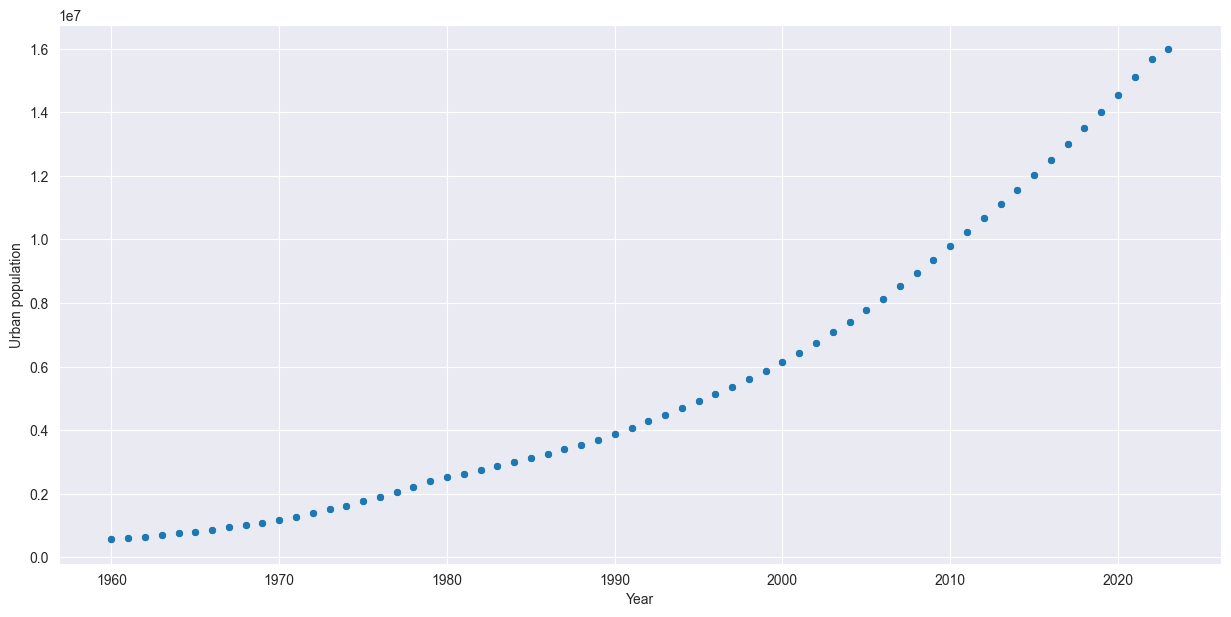

In [14]:
figure = plt.figure(figsize=(15,7))

sns.scatterplot(x='Year', y='Urban population', data=kenyan_df_population) # scatter plot 
plt.show()

#### Shows a steady increase in the urban population in Kenya over the years.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Scatter plot of rural population over the years

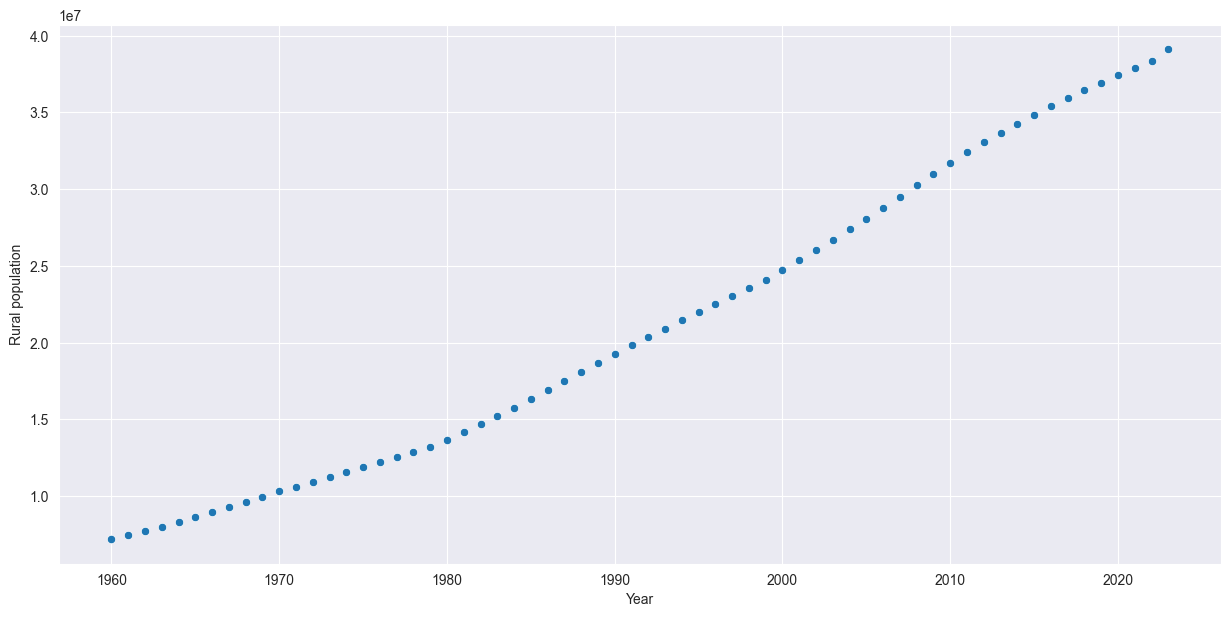

In [15]:
figure = plt.figure(figsize=(15,7))

sns.scatterplot(x='Year', y='Rural population', data=kenyan_df_population) # scatter plot 
plt.show()

#### Again, the population has increased.
#### Could this be from births? And if it all there is some urban to rural migration, how will we investigate its effect on the rural population?


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> A point plot to compare the two categories of data

<Axes: >

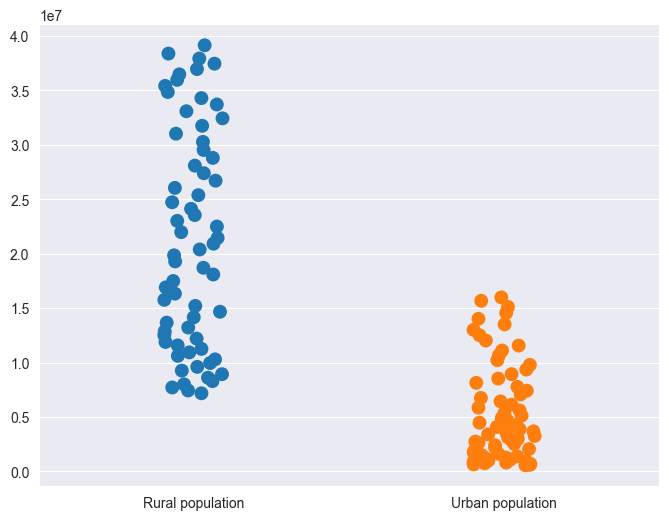

In [16]:

plt.figure(figsize=(8, 6))  # Optional: set the figure size
sns.stripplot(data=kenyan_df_population[['Rural population', 'Urban population']], jitter=True, marker='o', size=10)


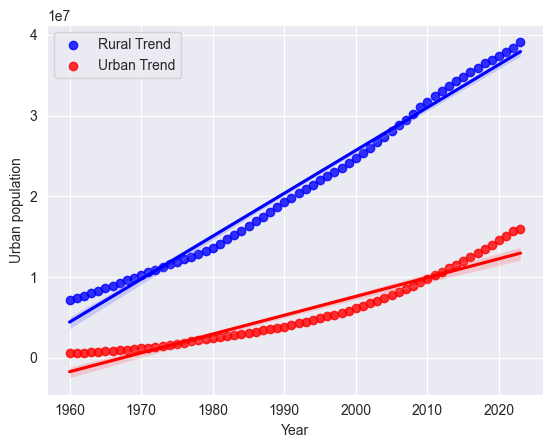

In [17]:
# Trend line for rural population
sns.regplot(x='Year', y='Rural population', data= kenyan_df_population , color='blue', label='Rural Trend')

# Plot the trend line for urban population
sns.regplot(x='Year', y='Urban population', data= kenyan_df_population , color='red', label='Urban Trend')

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Both rural population and urban population increase. 
### I need to investigate what would be indicators of an increase in one causing a decrease in another.
#### Maybe factor in birth rates?

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Importing a data set containing death rates and birth rates by year and joining the 2 data sets


In [18]:
birth_rates_df = pd.read_csv(r"C:\Users\user pc\Desktop\DTE Datathon\Birth rates.csv")
death_rates_df = pd.read_csv(r"C:\Users\user pc\Desktop\DTE Datathon\Death rates.csv")


In [19]:

# dropping column 3

birth_rates_df=birth_rates_df.drop(" Annual % Change",axis=1)

print(birth_rates_df)

    Date   Births per 1000 People
0   1960                   51.166
1   1961                   51.085
2   1962                   51.005
3   1963                   50.925
4   1964                   50.875
..   ...                      ...
59  2019                   28.595
60  2020                   28.286
61  2021                   27.976
62  2022                   27.667
63  2023                   27.357

[64 rows x 2 columns]


###### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Combining the two data frames with the original data frame and renaming to kenyan_df


In [20]:
## renaming the columns from the 2 data frames
columns_to_add= {
    'Birth rates':birth_rates_df[' Births per 1000 People'], 'Death rates': death_rates_df[' Deaths per 1000 People'],
}

## Adding the selected columns to kenyan_df_population
kenyan_df = pd.concat([kenyan_df_population, pd.DataFrame(columns_to_add)], axis=1)
pd.DataFrame(kenyan_df)

print(kenyan_df)


   Entity  Year  Urban population  Rural population  Birth rates  Death rates
0   Kenya  1960         570661.00        7180774.00       51.166       20.212
1   Kenya  1961         608791.00        7438679.00       51.085       19.646
2   Kenya  1962         650185.00        7713393.00       51.005       19.081
3   Kenya  1963         699081.00        7998119.00       50.925       18.515
4   Kenya  1964         752562.00        8294825.00       50.875       18.069
..    ...   ...               ...               ...          ...          ...
59  Kenya  2019       14015215.00       36936236.00       28.595        5.483
60  Kenya  2020       14553419.00       37432360.00       28.286        5.448
61  Kenya  2021       15102890.00       37902724.00       27.976        5.414
62  Kenya  2022       15667971.23       38359515.77       27.667        5.379
63  Kenya  2023       15979169.94       39121416.06       27.357        5.344

[64 rows x 6 columns]


 ##### <span style="color:red;">Disclaimer: The above rates are for every 1000 people of the population.</span>


###### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> To determine changes in the population due to rural-urban migration.


In [21]:
# Calculate the urban population increase due to migration and demographic factors
kenyan_df['Immigration'] = (kenyan_df['Urban population'] * kenyan_df['Birth rates'] / 100) - (kenyan_df['Urban population'] * kenyan_df['Death rates'] / 100)
pd.options.display.float_format = '{:.2f}'.format

# Print the updated DataFrame
print(kenyan_df)

   Entity  Year  Urban population  Rural population  Birth rates  Death rates  \
0   Kenya  1960         570661.00        7180774.00        51.17        20.21   
1   Kenya  1961         608791.00        7438679.00        51.09        19.65   
2   Kenya  1962         650185.00        7713393.00        51.01        19.08   
3   Kenya  1963         699081.00        7998119.00        50.92        18.52   
4   Kenya  1964         752562.00        8294825.00        50.88        18.07   
..    ...   ...               ...               ...          ...          ...   
59  Kenya  2019       14015215.00       36936236.00        28.59         5.48   
60  Kenya  2020       14553419.00       37432360.00        28.29         5.45   
61  Kenya  2021       15102890.00       37902724.00        27.98         5.41   
62  Kenya  2022       15667971.23       38359515.77        27.67         5.38   
63  Kenya  2023       15979169.94       39121416.06        27.36         5.34   

    Immigration  
0     176

In [175]:
print(kenyan_df)

   Entity  Year  Urban population  Rural population  Birth rates  Death rates  \
0   Kenya  1960         570661.00        7180774.00        51.17        20.21   
1   Kenya  1961         608791.00        7438679.00        51.09        19.65   
2   Kenya  1962         650185.00        7713393.00        51.01        19.08   
3   Kenya  1963         699081.00        7998119.00        50.92        18.52   
4   Kenya  1964         752562.00        8294825.00        50.88        18.07   
..    ...   ...               ...               ...          ...          ...   
59  Kenya  2019       14015215.00       36936236.00        28.59         5.48   
60  Kenya  2020       14553419.00       37432360.00        28.29         5.45   
61  Kenya  2021       15102890.00       37902724.00        27.98         5.41   
62  Kenya  2022       15667971.23       38359515.77        27.67         5.38   
63  Kenya  2023       15979169.94       39121416.06        27.36         5.34   

    Immigration  
0     176

In [22]:
## calculating the population growth rate and adding it as a column to the dataframe
## urban population growth rate
kenyan_df['Urban_Population_Growth_Rate'] = ((kenyan_df['Urban population'] - kenyan_df['Urban population'].shift(1)) / kenyan_df['Urban population'].shift(1)) * 100

## rural population growth rate
kenyan_df['Rural_Population_Growth_Rate'] = ((kenyan_df['Rural population'] - kenyan_df['Rural population'].shift(1)) / kenyan_df['Rural population'].shift(1)) * 100

In [23]:
# Fill NaN values with a specific value, 0
kenyan_df['Urban_Population_Growth_Rate'] = kenyan_df['Urban_Population_Growth_Rate'].fillna(0)
kenyan_df['Rural_Population_Growth_Rate'] = kenyan_df['Rural_Population_Growth_Rate'].fillna(0)


In [23]:
print(kenyan_df)

   Entity  Year  Urban population  Rural population  Birth rates  Death rates  \
0   Kenya  1960         570661.00        7180774.00        51.17        20.21   
1   Kenya  1961         608791.00        7438679.00        51.09        19.65   
2   Kenya  1962         650185.00        7713393.00        51.01        19.08   
3   Kenya  1963         699081.00        7998119.00        50.92        18.52   
4   Kenya  1964         752562.00        8294825.00        50.88        18.07   
..    ...   ...               ...               ...          ...          ...   
59  Kenya  2019       14015215.00       36936236.00        28.59         5.48   
60  Kenya  2020       14553419.00       37432360.00        28.29         5.45   
61  Kenya  2021       15102890.00       37902724.00        27.98         5.41   
62  Kenya  2022       15667971.23       38359515.77        27.67         5.38   
63  Kenya  2023       15979169.94       39121416.06        27.36         5.34   

    Immigration  Urban_Popu

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Pointplot for growthrates of both rural and urban populations.


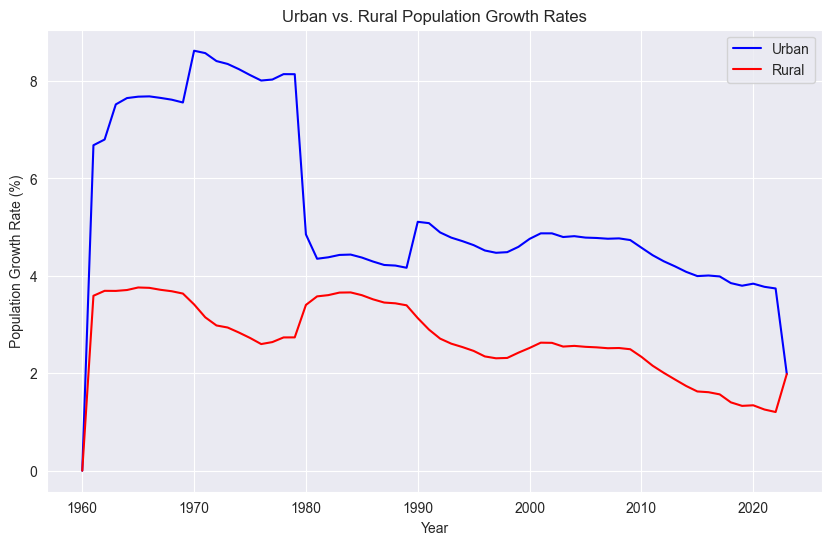

In [24]:
# Plotting
plt.figure(figsize=(10, 6)) 

# Plot urban population growth rate in blue
plt.plot(kenyan_df['Year'], kenyan_df['Urban_Population_Growth_Rate'], label='Urban', color='blue')

# Plot rural population growth rate in green
plt.plot(kenyan_df['Year'],kenyan_df['Rural_Population_Growth_Rate'], label='Rural', color='red')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Population Growth Rate (%)')
plt.title('Urban vs. Rural Population Growth Rates')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

#### While both have been steadily increasing, urban population has seen a greater increase.
#### The greatsest exodus was in the period between, 1960-1980and then a steady decline after that. Is it that people are actively preferring to stay in rural areas? or have more rural areas become urbanised hence denecessitating the need to move?

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> We could also have a plot to show rural-urban and/or urban-urban migration in Kenya


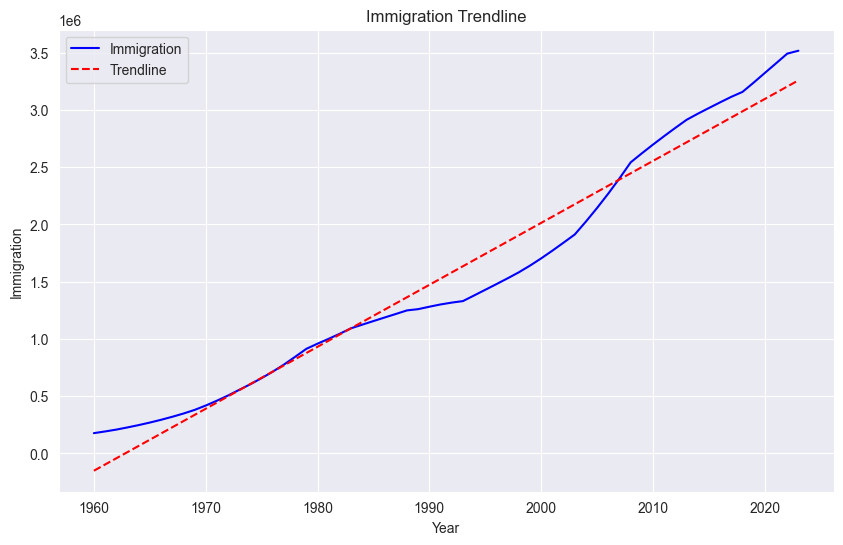

In [25]:
# package import

from sklearn.linear_model import LinearRegression


# Fit linear regression to immigration data
x = kenyan_df['Year'].values.reshape(-1, 1)
y = kenyan_df['Immigration'].values.reshape(-1, 1)
regression = LinearRegression().fit(x, y)

# Predictions based on the regression model
predictions = regression.predict(x)

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot immigration data in blue
plt.plot(kenyan_df['Year'], kenyan_df['Immigration'], label='Immigration', color='blue')

# Plot trendline in red
plt.plot(kenyan_df['Year'], predictions, linestyle='--', color='red', label='Trendline')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Immigration')
plt.title('Immigration Trendline')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

##### This proofs that the increase in population in urban areas is contributed by migrations with the number of people migrating into urban areas steadily increasing and is projected to continue increasing from the regression model.


In [26]:
## converting the dataframe to a file
kenyan_df_population.to_csv('Kenyan population data.csv', index=False)
